In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import math
import csv
import seaborn as sns

In [2]:
# Define speeds (m/s) corresponding to 0-40 Hz settings in wind tunnel
### (Just for record-keeping)
hzArray = np.array((0, 5, 10, 15, 20, 25, 30, 35, 40))
speedArrayFull = np.array((0.00, 1.26363735, 1.58562983, 2.07066356, 2.571993, 3.18291372, 3.75322345, 4.33626595, 4.91413509))
speedArray = np.array((0.00, 1.264, 1.586, 2.071, 2.572, 3.183, 3.753, 4.336, 4.914))
###

In [3]:
BIGDAT = np.load('BigDataVelMax.npy')

In [4]:
DF = pd.DataFrame(BIGDAT, columns=['Error (m/s)', 'Seed', 'Geometry', 'Filter Length', 'LOOCV'])
DF.loc[DF['Geometry']==3 ,'Geometry']='Triangle'
DF.loc[DF['Geometry']==4 ,'Geometry']='Square'
DF.loc[DF['Geometry']==5 ,'Geometry']='Pentagon'
DF.loc[DF['Geometry']==6 ,'Geometry']='Hexagon'
for kk in range(1, 9):
    DF.loc[DF['LOOCV']==kk ,'LOOCV']= speedArray[kk]

# DF = DF.groupby(['LOOCV', 'Filter Length', 'Geometry'], as_index=False).mean()
DF2 = DF.groupby(['Geometry'], as_index=False).mean()
DF = DF.groupby(['LOOCV', 'Geometry'], as_index=False).mean()
# print(DF)
print(DF2)

   Geometry  Error (m/s)  Seed  Filter Length     LOOCV
0   Hexagon     0.117131   3.0       2.666667  2.959875
1  Pentagon     0.169306   3.0       2.666667  2.959875
2    Square     0.160506   3.0       2.666667  2.959875
3  Triangle     0.267665   3.0       2.666667  2.959875


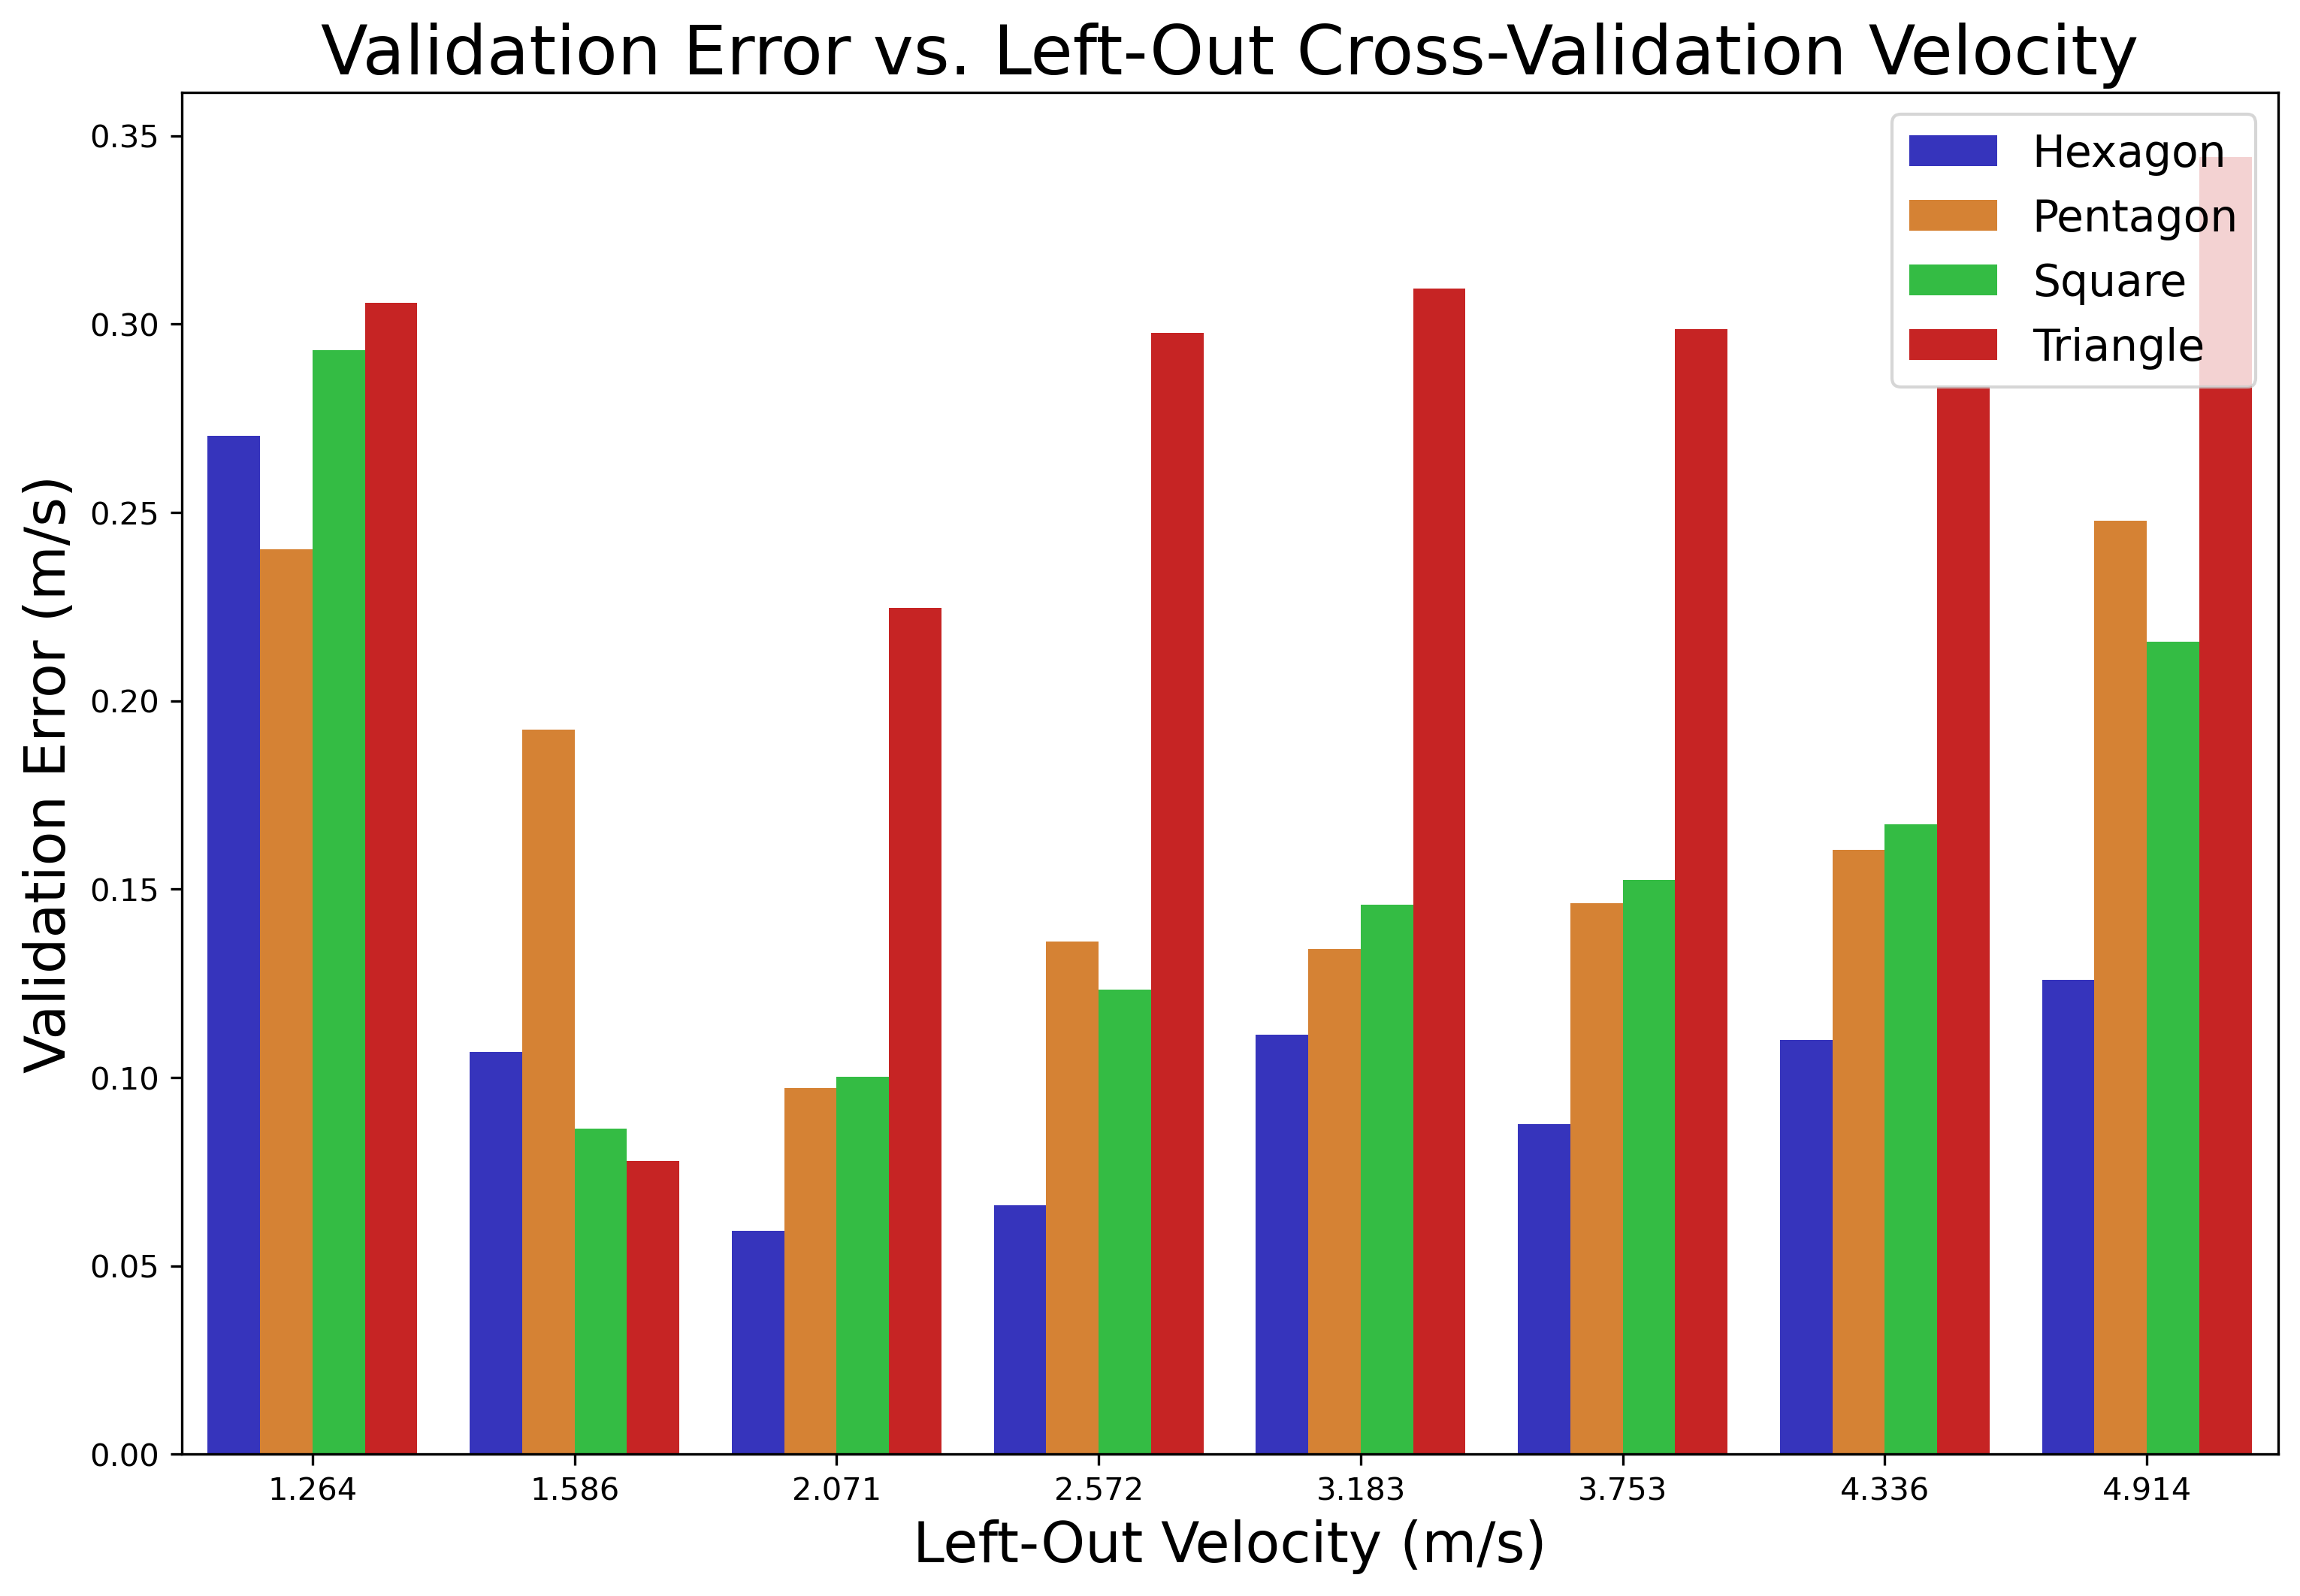

In [5]:

plt.figure(figsize=(12, 8), dpi=300)
titleFont=22
axisFont=18
legendFont=14

# ax = sns.barplot(x="LOOCV", y="Error (m/s)", hue="Geometry", palette=['#e10909', '#1dd332', '#f08119', '#201dd3'], data=DF[(DF["Filter Length"]==1)])
ax = sns.barplot(x="LOOCV", y="Error (m/s)", hue="Geometry", palette=['#201dd3', '#f08119', '#1dd332', '#e10909'], data=DF)
plt.title('Validation Error vs. Left-Out Cross-Validation Velocity', fontsize=titleFont)
ax.set_xlabel('Left-Out Velocity (m/s)', fontsize=axisFont)
ax.set_ylabel('Validation Error (m/s)', fontsize=axisFont)
ax.legend(fontsize=legendFont)
plt.grid(False)
plt.savefig('VelocityBarPlot.png')
plt.show()

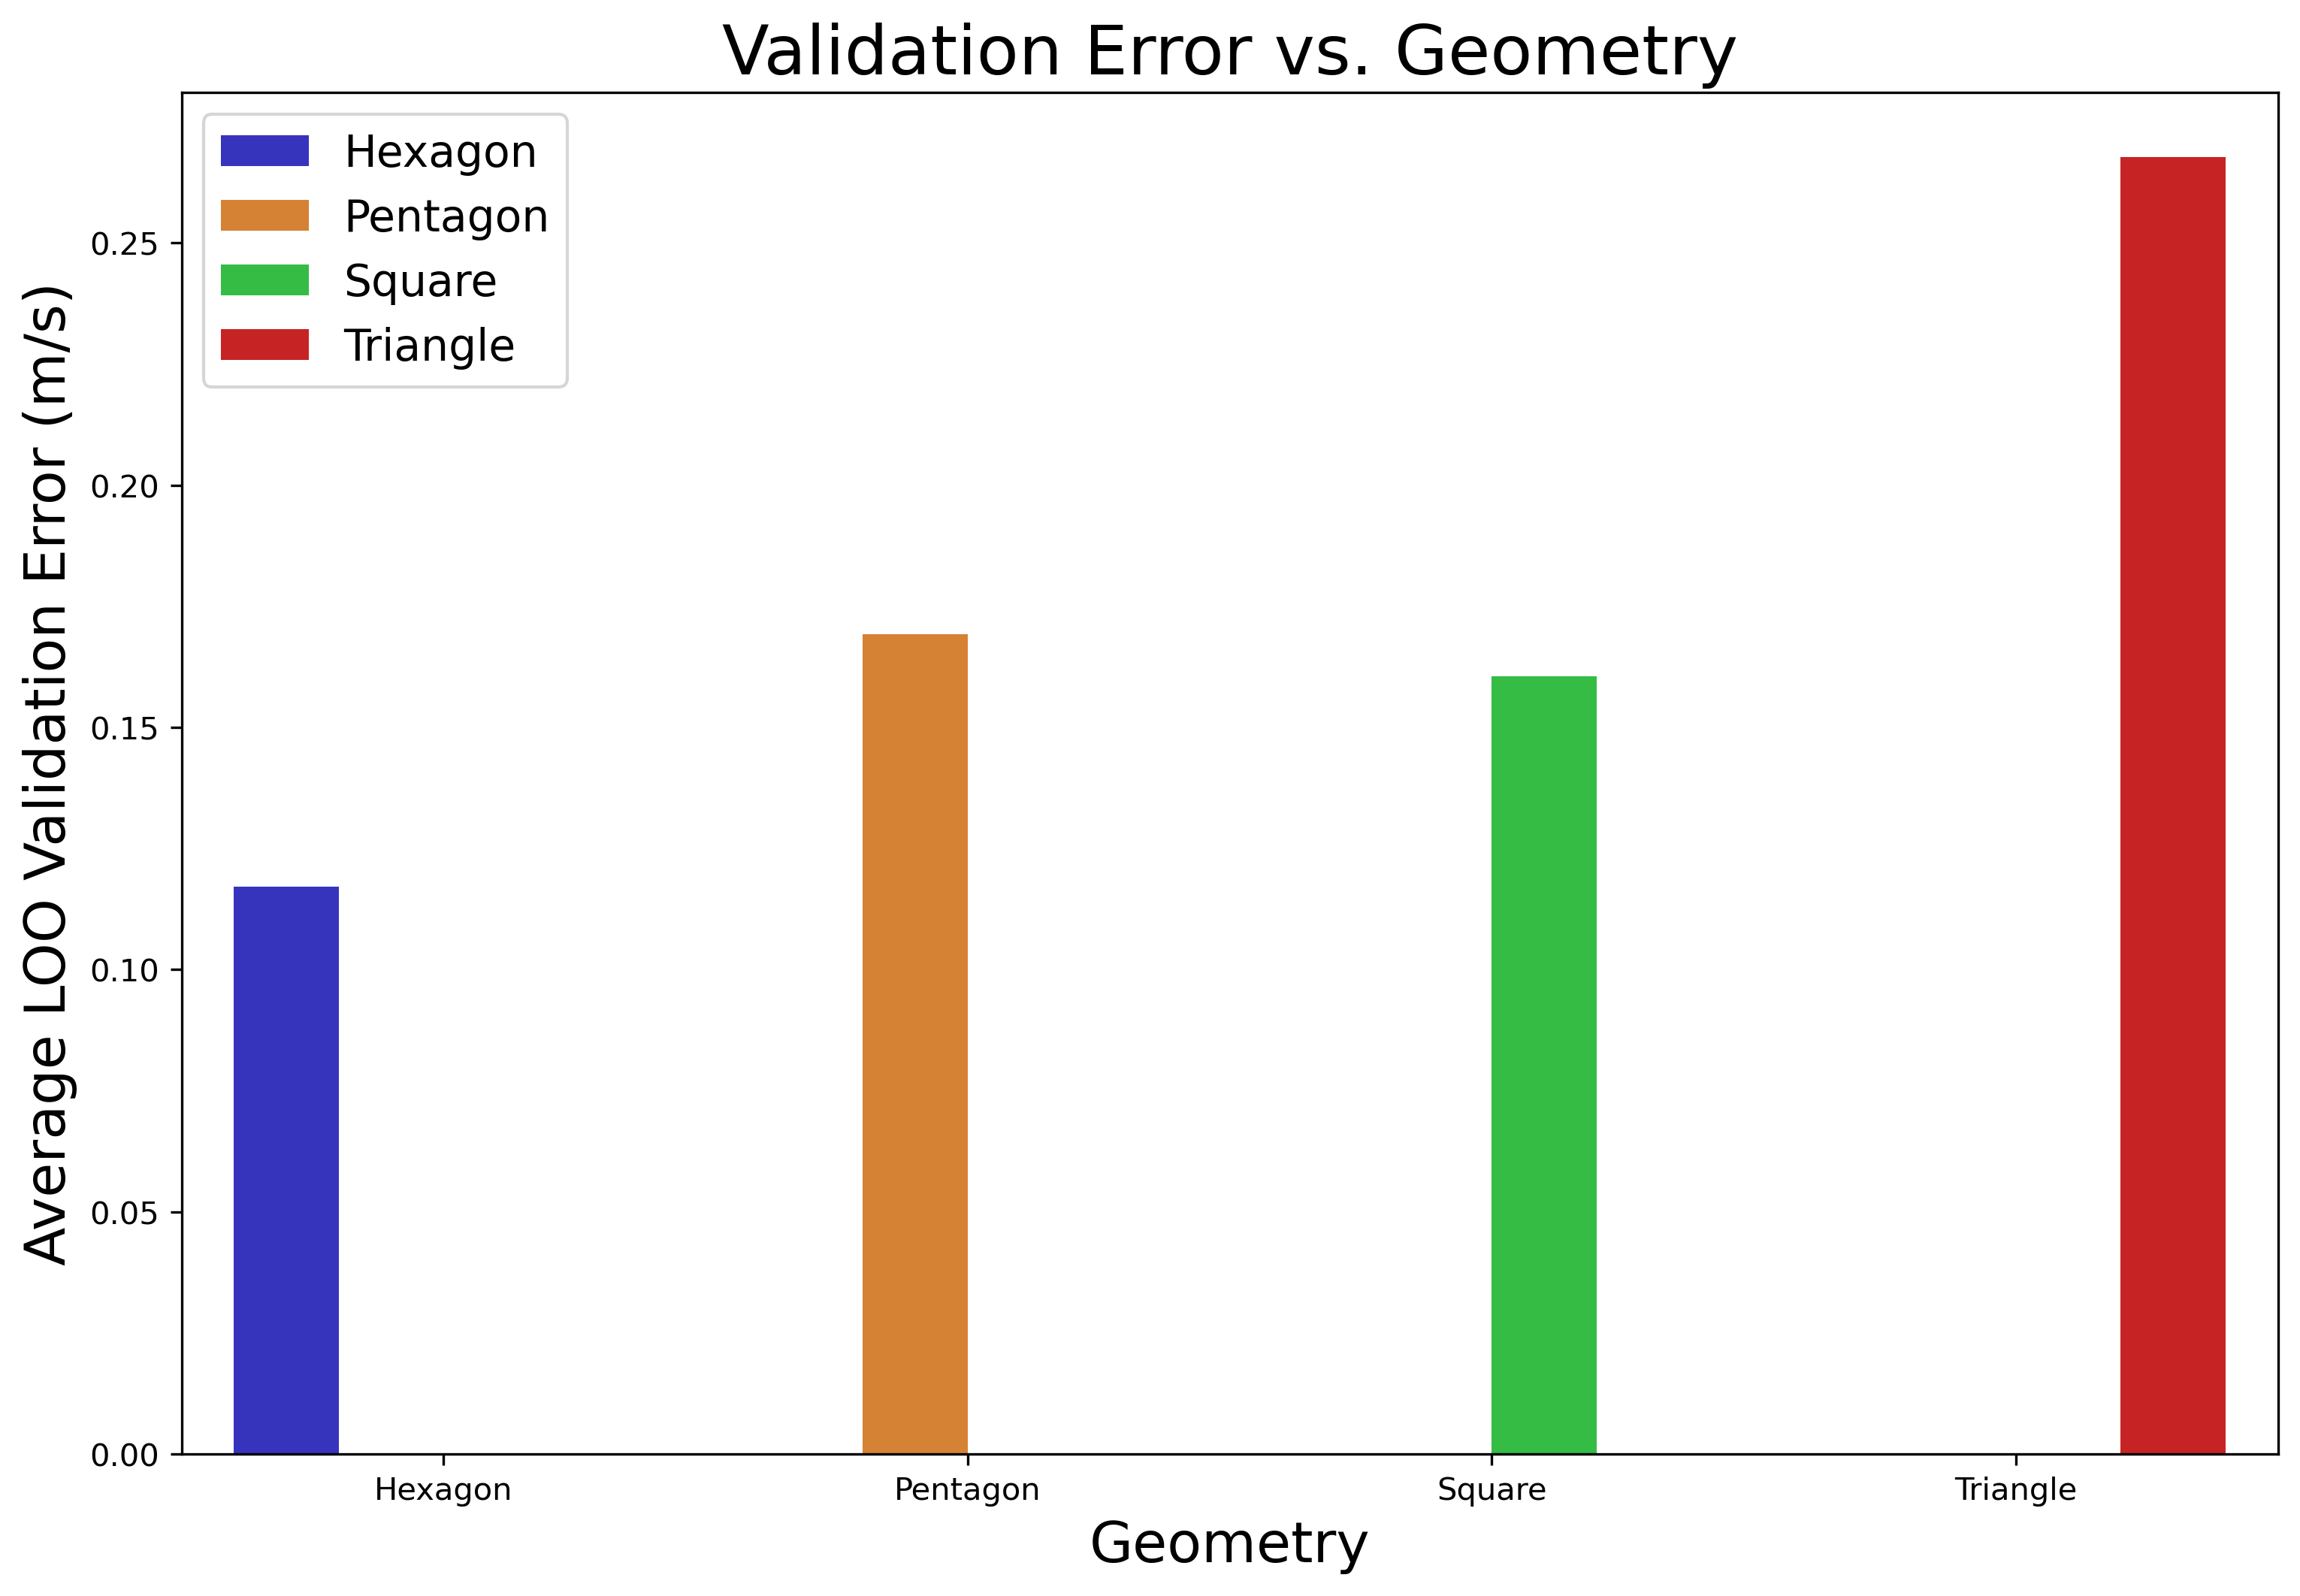

In [6]:

plt.figure(figsize=(12, 8), dpi=300)
titleFont=22
axisFont=18
legendFont=14

# ax = sns.barplot(x="LOOCV", y="Error (m/s)", hue="Geometry", palette=['#e10909', '#1dd332', '#f08119', '#201dd3'], data=DF[(DF["Filter Length"]==1)])
ax = sns.barplot(x="Geometry", y="Error (m/s)", hue="Geometry", palette=['#201dd3', '#f08119', '#1dd332', '#e10909'], data=DF2)
plt.title('Validation Error vs. Geometry', fontsize=titleFont)
ax.set_xlabel('Geometry', fontsize=axisFont)
ax.set_ylabel('Average LOO Validation Error (m/s)', fontsize=axisFont)
ax.legend(fontsize=legendFont)
plt.grid(False)
plt.savefig('VelocityBarPlotGeom.png')
plt.show()